In [16]:
import pymysql as sql

MySQL과 연동시킬려면, 커넥션을 활성화시켜야 한다  
이때, PyMySQL -> 드라이버 역할

In [17]:
#step1 Driver 설치 -> pymysql

#step2 커넥션 객체 생성
sql_con = sql.connect(
    host = "localhost",
    user="urstory",
    passwd='u1234',
    database="classicmodels",
    charset='utf8' 
)

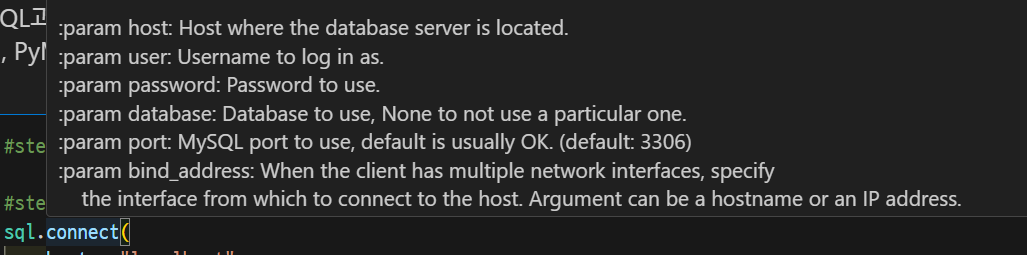

In [18]:
cur = sql_con.cursor()

In [19]:
query = "show databases;"

cur.execute(query)
#4
#실행하면 바로 갔다옴
#cur 객체가 가지고 있다

4

In [20]:
db_s = cur.fetchall()
db_s

(('classicmodels',),
 ('examplesdb',),
 ('information_schema',),
 ('performance_schema',))

In [21]:
cur = sql_con.cursor(sql.cursors.DictCursor)

In [22]:
query = "show databases;"
cur.execute(query)
db_s = cur.fetchall()
db_s #dict 형태

"""
[{'Database': 'classicmodels'},
 {'Database': 'examplesdb'},
 {'Database': 'information_schema'},
 {'Database': 'performance_schema'}]
"""

"\n[{'Database': 'classicmodels'},\n {'Database': 'examplesdb'},\n {'Database': 'information_schema'},\n {'Database': 'performance_schema'}]\n"

In [23]:
# !pip install pandas

In [24]:
import pandas as pd

In [25]:
pd.DataFrame(db_s)

,Database
0,classicmodels
1,examplesdb
2,information_schema
3,performance_schema


In [26]:
# # 커넥션 종료
# # 해체는 조립의 역순!!
# cur.close()
# sql_con.close()

In [27]:
if cur is not None:
    cur.close()
if sql_con is not None:
    sql_con.close()

In [28]:
sql_con = sql.connect(
    host = "localhost",
    user="urstory",
    passwd='u1234',
    database="classicmodels",
    charset='utf8' 
)

In [29]:
cur = sql_con.cursor()

In [30]:
query = '''CREATE TABLE user_test ( 
id int(11) NOT NULL AUTO_INCREMENT PRIMARY KEY, 
name varchar(255), 
address varchar(255) 
) 
''' 

cur.execute(query)
sql_con.commit()

OperationalError: (1050, "Table 'user_test' already exists")

In [31]:
cur = sql_con.cursor(sql.cursors.DictCursor)
query = "show tables;"
cur.execute(query)
db_s = cur.fetchall()
db_s

[{'Tables_in_classicmodels': 'customers'},
 {'Tables_in_classicmodels': 'employees'},
 {'Tables_in_classicmodels': 'offices'},
 {'Tables_in_classicmodels': 'orderdetails'},
 {'Tables_in_classicmodels': 'orders'},
 {'Tables_in_classicmodels': 'payments'},
 {'Tables_in_classicmodels': 'productlines'},
 {'Tables_in_classicmodels': 'products'},
 {'Tables_in_classicmodels': 'user_test'}]

In [32]:
query = '''INSERT INTO user_test (name, address) 
    VALUES ('홍길동', '서울');'''

cur.execute(query)
db_s = cur.fetchall()
db_s

[]

In [34]:
query = '''select * from user_test;'''

cur.execute(query)
db_s = cur.fetchall()
db_s

[{'id': 1, 'name': '홍길동', 'address': '서울'}]

In [35]:
insert_data = ['이몽룡', '강원도']
query = """
insert into user_test(name,address)
values(%s,%s);
"""

cur.execute(query, insert_data)
sql_con.commit()

[]